In [1]:
import os
from fastai.vision.all import *

In [2]:
path = 'C:/Users/mreek/Documents/beedata/train'

In [7]:
dblock = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=400, min_scale=0.75, flip_vert=True))
dls = dblock.dataloaders(path, bs=4)

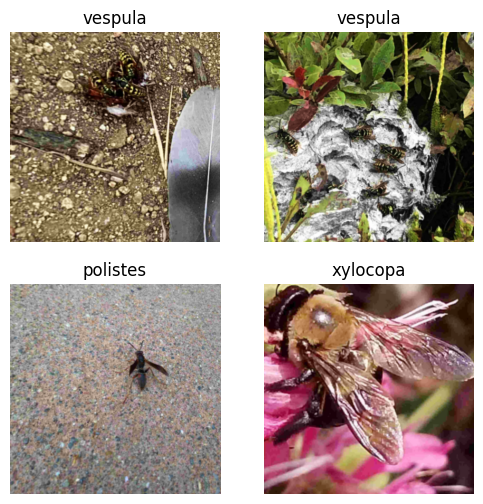

In [8]:
dls.show_batch(nrows=2, ncols=2)

In [9]:
learn = vision_learner(dls, xresnet34, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.load('bee34')
#learn.lr_find()

SuggestedLRs(valley=0.0003981071640737355)

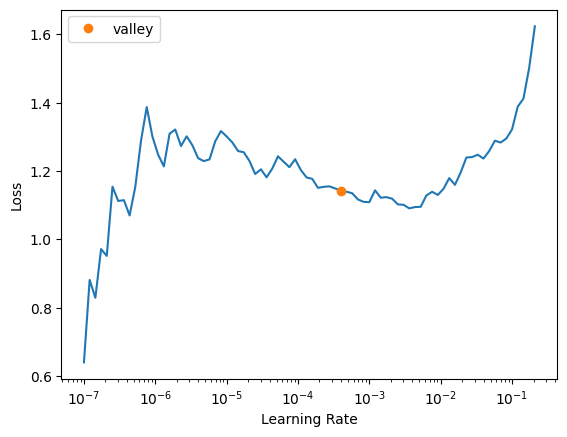

In [10]:
# learn.fit_one_cycle(3,6e-3)
# learn.unfreeze()
learn.lr_find()

In [11]:
learn.fine_tune(2,4e-4,freeze_epochs = 0)

In [8]:
learn.save('bee34')

Path('models/bee34.pth')

In [7]:
interp = ClassificationInterpretation.from_learner(learn)

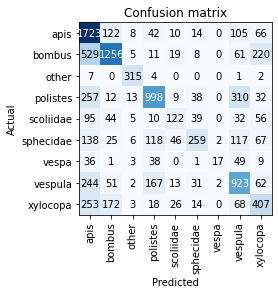

In [8]:
interp.plot_confusion_matrix()

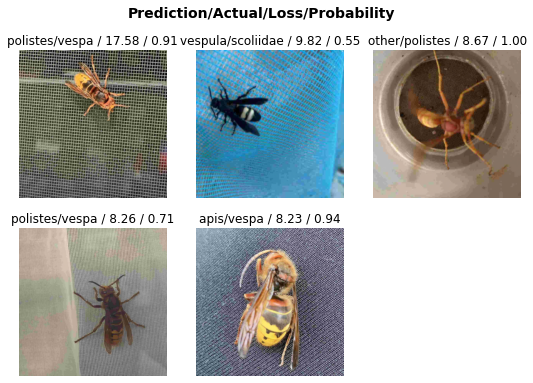

In [10]:
interp.plot_top_losses(5)